<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XG Boost
* Boosting is not a specific algorithm but a meta algorithm
* Uses a collection of weak learners to build a strong learner.
* Iteratively learning on subsets of the data you have at hand
* xgboost has 2 apis-:
  * scikit compatible api using the fit/predict paradigm
  * xgboost own api
* All ML models **mininimize a loss function**
* xgboost uses **reg:linear** for linear regression
* **reg:logistic** for classification when only interested in class label and not probability
* **binary:logistic** if you are interested in probability

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
kidney=pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/82c231cd41f92325cf33b78aaa360824e6b599b9/chronic_kidney_disease.csv',header=None)
ames_housing=pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/17a7c5c0acd7bfa253827ea53646cf0db7d39649/ames_unprocessed_data.csv')

In [3]:
kidney.replace(to_replace='?',value=np.nan,inplace=True)

In [11]:
kidney

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,48,80,1.020,1,0,MIS,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,MIS,normal,notpresent,notpresent,MIS,...,38,6000,MIS,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,MIS,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [33]:
path='drive/MyDrive/Colab Notebooks/Datacamp/xg_boost/kidney.csv'

In [34]:
kidney=pd.read_csv(path)

In [35]:
kidney.select_dtypes(include='object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [36]:
kidney['pcv']=kidney.pcv.replace(to_replace='\t?',value=0)
kidney['pcv']=kidney.pcv.astype('float')

In [37]:
kidney['rc']=kidney.rc.replace(to_replace='\t?',value=0)
kidney['rc']=kidney.rc.astype('float')


In [38]:
kidney.drop(columns='wc',inplace=True)

In [39]:
object_cols=kidney.select_dtypes(include=object).columns
for col in object_cols:
  kidney[col].fillna(value='MIS',inplace=True)


In [40]:
num_cols=kidney.select_dtypes(include=['float','int']).columns
for col in num_cols:
  kidney[col].fillna(value=kidney[col].median(),inplace=True)

In [41]:
kidney.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [42]:
kidney['classification']=np.where(kidney['classification']=='ckd',1,0)

In [43]:
xgb_cl=xgb.XGBClassifier(objective='binary:logistic')

In [44]:
y=kidney.classification

In [45]:
X=kidney.drop(columns='classification')

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

### Using XGB and GridSearchCV

In [47]:
xgb_cl=xgb.XGBClassifier()

In [53]:
obj_cols=X.select_dtypes(include='object').columns

In [55]:
X=pd.get_dummies(X,columns=obj_cols)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [123]:
param_grid={'max_depth':[2,3,4,5,6,7],
            'n_estimators':[2,5,10,15,20,50]}

In [124]:
rgb_cv=GridSearchCV(estimator=xgb_cl,param_grid=param_grid,scoring='roc_auc_ovr')

In [125]:
rgb_cv.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [2, 5, 10, 15, 20, 50]},
             scoring='roc_auc_ovr')

In [126]:
rgb_cv.best_params_

{'max_depth': 2, 'n_estimators': 10}

In [127]:
rgb_cv.best_score_

0.9893750000000001

In [128]:
y_pred=rgb_cv.predict(X_test)

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [130]:
roc_auc_score(y_test,y_pred)

1.0

In [131]:
y_proba=rgb_cv.predict_proba(X_test)

In [132]:
fpr,tpr,thresholds=roc_curve(y_test,y_proba[:,1])

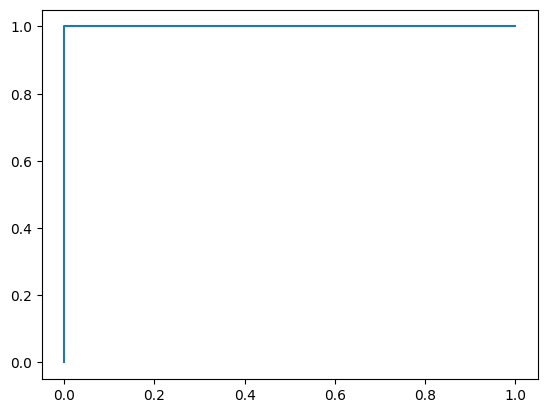

In [133]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr)

### Using GridSearchCV and pipelines

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [135]:
xgb_cl2=xgb.XGBClassifier()

In [140]:
steps=[('scaler',StandardScaler()),('XGB',xgb_cl2)]

In [141]:
xgb_pipe=Pipeline(steps)

In [153]:
# The name of the param grid must begin with the step in the pipeline which is the model
param_grid2={'XGB__max_depth':[2,3,4,5],
             'XGB__n_estimators':[5,10,20,25],
             'XGB__learning_rate':[0.01,0.05,0.1,0.5]}

In [154]:
rgb_cv2=GridSearchCV(estimator=xgb_pipe,param_grid=param_grid2,scoring='roc_auc_ovr')

In [155]:
rgb_cv2.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      in...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'XGB__max_depth': [2, 3, 4, 5],
                         'XGB__n_estimators': [5, 10, 20, 25]},
             scoring='roc_auc_ovr')

In [156]:
rgb_cv2.best_params_

{'XGB__learning_rate': 0.01, 'XGB__max_depth': 2, 'XGB__n_estimators': 5}

In [157]:
rgb_cv2.best_score_

0.9891666666666667